This notebook addresses [HackerRank's](https://www.hackerrank.com) 10 Days of Statistics Normal Distribution challenges from Day 5:
* [Normal Distribution I](https://www.hackerrank.com/challenges/s10-normal-distribution-1/problem)
* [Normal Distribution II](https://www.hackerrank.com/challenges/s10-normal-distribution-2/problem)

Statistics was on my mind today after listening to an interview that was part of Women Who Code DC's Virtual Career Services Day.
Data Scientist Sian Lewis was interviewed about working in Data Science and there were many great pieces of advice. Among them was that it is helpful to have a strong statistics foundation.
I wrapped up my Data Science course with a Natural Language Processing project, but that comment encouraged me to review the basics.

I may as well be able to answer a question about basic statistics in interviews and keep coding patterns front-of-mind so I can access them under pressure!

In fact, having a normal distribution is one assumption necessary for conducting linear regressions.

In [2]:
#packages used in this notebook
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [3]:
plt.style.use("seaborn")

# Normal Distribution I
## Prompt:
In a certain plant, the time taken to assemble a car is a random variable, $X$, having a normal distribution with a mean of 20 hours and a standard deviation of 2 hours. What is the probability that a car can be assembled at this plant in:

1. Less than 19.5 hours?
2. Between 20 and 22 hours?

#### Input Format

There are three lines of input:
```
20 2
19.5
20 22
```
The first line contains 2 space-separated values denoting the respective mean and standard deviation for $X$. The second line contains the number associated with question 1. The third line contains 2 space-separated values describing the respective lower and upper range boundaries for question 2.

#### Output Format

There are two lines of output. Your answers must be rounded to a scale of 3 decimal places (e.g., 1.234):

On the first line, print the answer to question 1 (the probability that a car can be assembled in less than 19.5 hours).
On the second line, print the answer to question 2 (the probability that a car can be assembled in 20 to 22 hours).

In [115]:
mean, std = 20, 2
quest1 = 19.5
quest2 = [20, 22]

In [133]:
#write information to text file
with open("normdist1.txt", "w") as file: #w clears and writes over any information already there
    file.write(f"{mean} {std} \n")
    file.write(f"{quest1} \n")
    file.write(f"{quest2[0]} {quest2[1]}")
#using reserved word "with" intead of needing to specify file.close()

In [4]:
#read information from text file
with open("normdist1.txt","r") as file:
    mean, std = [int(i) for i in file.readline().strip().split(' ')]
    quest1 = float(file.readline().strip())
    quest2 = [int(i) for i in file.readline().strip().split(' ')]

18 and 22 are 1 standard deviation either side of the mean

one way to solve is to find what the cumulative probability is for values from 0 to 19.5

in a graphical sense, to sum up the area under the curve from 0 to 19.5

In [7]:
begin = 13
end = 27
xval = np.arange(begin,end,0.01) #range of x values, covering mean-7 and mean+7
yval = norm.pdf(xval,20,2) #probability density function for those values around the mean of 20 and standard deviation of 2

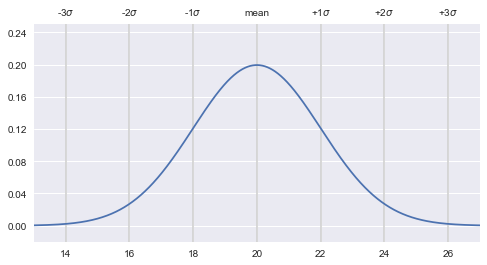

In [86]:
#create graph showing this normal distribution
fig, ax = plt.subplots(figsize=(8,4))
xticklist = [14,16,18,20,22,24,26]

plt.xlim((begin,end)) #set x limits

ax2 = ax.twiny() #set y axis to also be the same for ax2; upper axis
ax2.set_xlim(ax.get_xlim()) #give same x limits to upper axis
ax2.set_xticks(xticklist) #set upper axis tick positions
ax2.set_xticklabels(["-3$\sigma$","-2$\sigma$","-1$\sigma$","mean","+1$\sigma$","+2$\sigma$","+3$\sigma$"])

ax2.vlines(xticklist,ymin=-.02,ymax=.25,color="lightgrey")

#set y ticks and limits
plt.yticks(np.arange(0,.26,step=.04))
plt.ylim((-0.02,.25))

ax2.plot(xval,yval)
plt.show()

In [ ]:
#calculate sum of pdf at standard deviation values and mean
xticklist = [14,16,18,20,22,24,26]
sumvals = [0]#make first item 0
for i, stdev in enumerate(xticklist):
    if i==0:
        stdrange = np.arange(begin,stdev,0.01) #generate range
        
    elif i==(len(xticklist)-1):
        stdrange = np.arange(stdev,end,0.01)
    else:
        stdrange = np.arange(stdev,xticklist[i+1],0.01) #generate range

    norm.pdf(stdrange,20,2) #get pdf values for that range
    total = sum(pdfval)#sum pdf
    total+=sum(sumvals)#add sum of all prior pdf values
    sumvals.append(total)#add total to end of list

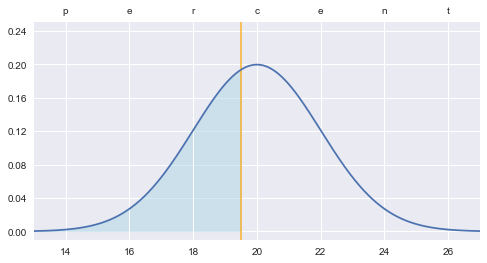

In [32]:
#plot with area shaded under curve up to 19.5, with select total sums of the pdf on upper axis
fig, ax = plt.subplots(figsize=(8,4))

plt.xlim((13,27)) #set x limits

ax2 = ax.twiny() #set y axis to also be the same for ax2 plot axes
ax2.set_xlim(ax.get_xlim()) #give same x limits to upper axis
ax2.set_xticks(xticklist) #set upper axis tick positions
ax2.set_xticklabels(["p","e","r","c","e","n","t"])

#set y ticks and limits
plt.yticks(np.arange(0,.26,step=.04))
plt.ylim((-0.01,.25))

ax2.plot(xval,yval)

#ax.plot(x, y, color='black')

threshold = quest1
ax.axvline(quest1, color='orange', alpha=0.7)
ax.fill_between(xval, yval, 0, where=(xval <= 19.5), color='lightblue', alpha=0.5)

plt.show()

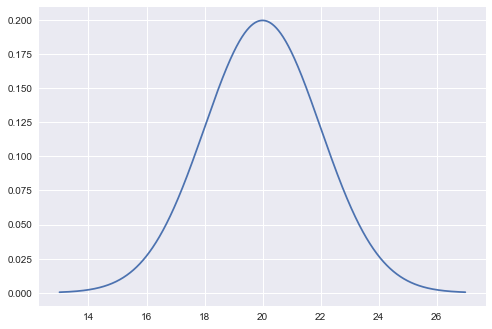

In [14]:
plt.plot(xval,yval)

In [87]:
#calculate cumulative probability function
sum(yval) #adding up all values generated for yval with norm.pdf

99.95347291153777

In [104]:
thisx = np.arange(13,20,.1) #a different interval and range, of about half (13-20) at larger intervals (.1 compared to .01)
thisy = norm.pdf(thisx,20,2)
sum(thisy)

4.898149948923554

# Normal Distribution II
## Prompt:

The final grades for a Physics exam taken by a large group of students have a mean of 70 and a standard deviation of 10. If we can approximate the distribution of these grades by a normal distribution, what percentage of the students:

1. Scored higher than 80 (had a grade > 80)?
2. Passed the test (had a grade $\ge$ 60)?
3. Failed the test (had a grade < 60)?

Find and print the answer to each question on a new line, rounded to a scale of 2 decimal places.

#### Input Format

There are three lines of input (shown below):
```
70 10
80
60
```
The first line contains 2 space-separated values denoting the respective mean and standard deviation for the exam. The second line contains the number associated with question 1. The third line contains the pass/fail threshold number associated with questions 2 and 3.

#### Output Format

There are three lines of output. Your answers must be rounded to a scale of 2 decimal places (e.g., `1.23`):

1. On the first line, print the answer to question 1 (the percentage of students that received a grade > 80).
2. On the second line, print the answer to question 2 (the percentage of students that received a grade $\ge$ 60).
3. On the third line, print the answer to question 3 (the percentage of students that received a grade < 60).

In [139]:
#read in text file for this question
with open("normdist2.txt",'r') as file:
    mean2, std2 = [int(i) for i in file.readline().strip().split(' ')] #split at single space,
    q1 = int(file.readline().strip()) #remove trailing and leading whitespace,
    q2 = q3 = int(file.readline().strip()) #and convert to integer